# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
   finds the correlation between independent and dependent variables.
- What type of machine learning is linear regression?
   supervise
- What is a “line of best fit” using the OLS method?
   line that best fits when you draw through the middle of the points   
- What is the difference between correlation and regression?
   correlation is a statistical measure and regression is a numerically relatation
- Describe a scenario when you would use linear regression and why you would use it. 
    you use it to analyze risk in cause and effect situations like seeing how age affects something


### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity:in a linear combination 
- Normality:asssumption that residuals are normal
- Homoscedasticity: error is constant in the model
- No multicollinearity: no multiple independent variables are correlated
- No endogeneity: no correlation between independent and error in dependent
- No autocorrelation: no relationship exsists

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0): y-intercept
- Coefficient of Independent Variable (B1): slope
- Standard Error:lower is it the better the estimate
- T-Statistic:determines the significances of the difference
- P-Value of T-Statistic (from the independent variable):determines if it has significants 


### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared: determines variance in dependent variable
- Adjusted R-squared: corrected model accuracy measure


# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [11]:
# make necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set()

In [12]:
# load data
df = pd.read_csv('house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,1,3,7.0,1180.0,0,1955.0,98178.0,47.5112,-122.257,1340
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,1,3,7.0,2170.0,400,1951.0,98125.0,47.7210,-122.319,1690
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,1,3,6.0,770.0,0,1933.0,98028.0,47.7379,-122.233,2720
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,1,5,7.0,1050.0,910,1965.0,98136.0,47.5208,-122.393,1360
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,1,3,8.0,1680.0,0,1987.0,98074.0,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20451,2997800021,2015-02-19,475000.0,3,2.50,1310,1294.0,2.0,0,1,3,8.0,1180.0,130,2008.0,98116.0,47.5773,-122.409,1330
20452,263000018,2014-05-21,360000.0,3,2.50,1530,1131.0,3.0,0,1,3,8.0,1530.0,0,2009.0,98103.0,47.6993,-122.346,1530
20453,6600060120,2015-02-23,400000.0,4,2.50,2310,5813.0,2.0,0,1,3,8.0,2310.0,0,2014.0,98146.0,47.5107,-122.362,1830
20454,291310100,2015-01-16,400000.0,3,2.50,1600,2388.0,2.0,0,1,3,8.0,1600.0,0,2004.0,98027.0,47.5345,-122.069,1410


### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [45]:
pd.set_option('mode.use_inf_as_na', True)

C:\Users\Amber\AppData\Local\Temp\ipykernel_16616\21531429.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


In [48]:
# explore data below (you will need to make new cells)
df = df.map(lambda x: np.nan if x in [np.inf, -np.inf] else x)
df.dropna(inplace=True)

C:\Users\Amber\anaconda3\envs\model_building\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amber\anaconda3\envs\model_building\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amber\anaconda3\envs\model_building\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amber\anaconda3\envs\model_building\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

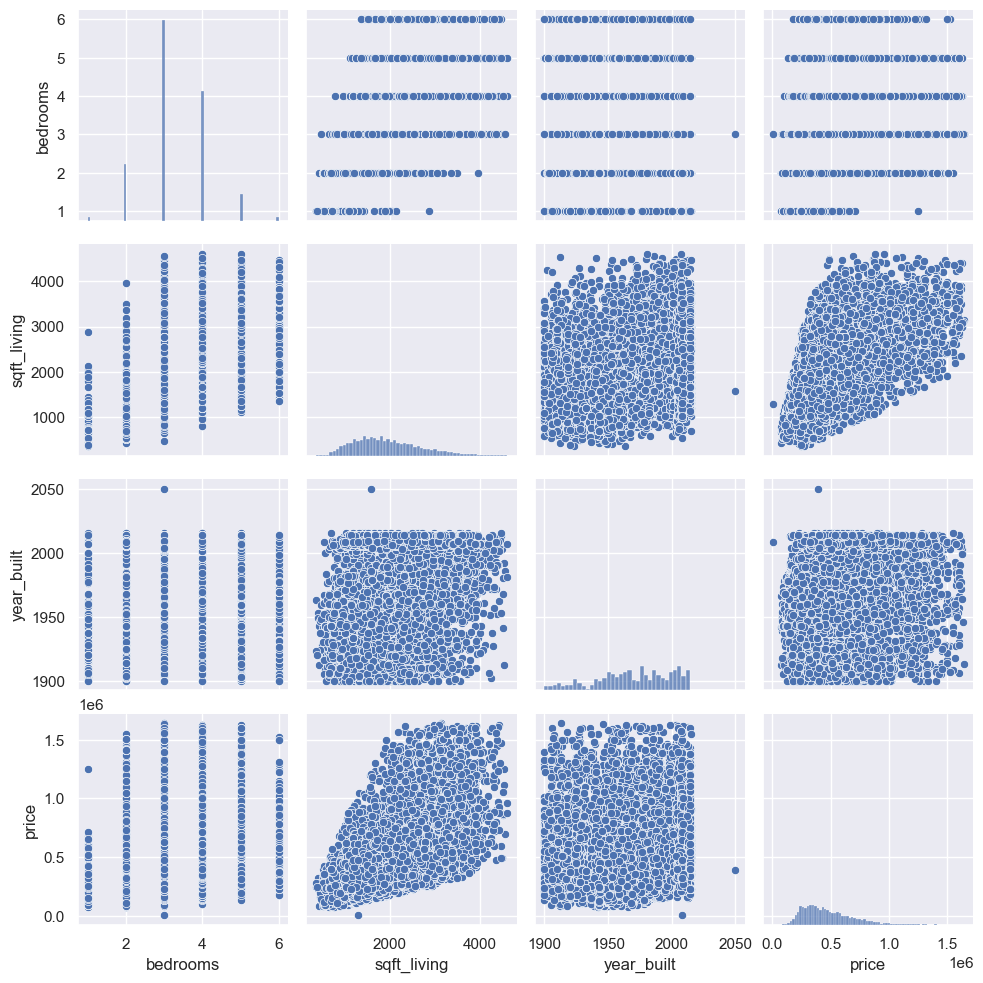

In [49]:
selected_columns = ['bedrooms', 'sqft_living', 'year_built', 'price']
sns.pairplot(df[selected_columns])
plt.show()

In [ ]:
### Step 3: Determine independent and dependent variable

In [58]:
# set X as square foot living
# set Y as price


<Axes: xlabel='sqft_living', ylabel='price'>

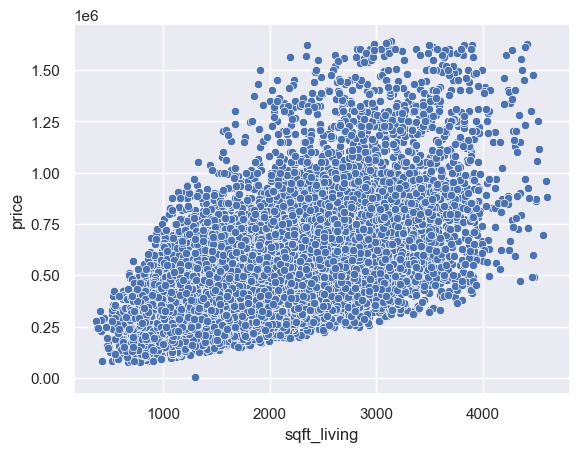

In [59]:
# visualize relationship between X and Y
sns.scatterplot(x=df['sqft_living'], y=df['price'])

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [60]:
# fit model to X and Y variables (you will need to make more cells)

In [61]:
x1 = df['sqft_living']
y = df['price']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:00:56   Log-Likelihood:            -2.7756e+05
No. Observations:               20452   AIC:                         5.551e+05
Df Residuals:                   20450   BIC:                         5.551e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.208e+04   3792.485     24.279      0.000    8.46e+04    9.95e+04
sqft_living   203.0105      1.830    110.946      0.000     199.424     206.597
==============================================================================
Omnibus:                     3897.801   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9043.910
Skew:                           1.083   Prob(JB):                         0.00
Kurtosis:                       5.433   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 5: Interpret Model Summary 

In [62]:
# print out and interpret model summary // terms identified below

Interpret the following from your model:

- R-squared: 0.376
- Coefficient of independent variable:203.0105
- P-value of T-statistic:0.00
- P-value of F-statistic:0.00

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [63]:
# predict new y values (dependent variables) by feeding model new independent variable values


In [64]:
#did the average sqft of an apartment in new york so small!
predict_df = pd.DataFrame({'constant':1, 'sqft_living':[500, 800]})
predict_df

,constant,sqft_living
0,1,500
1,1,800


In [65]:
predictions = results.predict(predict_df)
predictions

0    193581.978914
1    254485.133686
dtype: float64

# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [66]:
# Pick another independent variable. Be sure to avoid multicollinearity. 
y = df['price']
x1 = df[['sqft_living', 'year_built']]

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [67]:
# fit new regression model (you will need to make more cells)

In [68]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     7249.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:01:09   Log-Likelihood:            -2.7689e+05
No. Observations:               20452   AIC:                         5.538e+05
Df Residuals:                   20449   BIC:                         5.538e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.427e+06   9.03e+04     37.964      0.000    3.25e+06     3.6e+06
sqft_living   226.3531      1.881    120.354      0.000     222.667     230.039
year_built  -1715.6673     46.401    -36.974      0.000   -1806.618   -1624.717
==============================================================================
Omnibus:                     3445.669   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8001.494
Skew:                           0.967   Prob(JB):                         0.00
Kurtosis:                       5.376   Cond. No.                     1.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared: 0.415
- Adjusted R-squared:0.415
- Coefficient of independent variables:226.3531, -1715.6673
- P-value of T-statistic:0.000
- P-value of F-statistic:0.0000



If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [69]:
# predict new y values (dependent variables) by feeding model new independent variable values

In [76]:
new_predict_df = pd.DataFrame({'constant':1, 'year_built':[2023, 2024], 'sqft_living':[500, 800]})
new_predict_df

,constant,year_built,sqft_living
0,1,2023,500
1,1,2024,800


In [79]:
new_predictions = results.predict(new_predict_df)
new_predictions

0    3.026655e+06
1    2.512181e+06
dtype: float64

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [70]:
# create new markdown cell and write down your observations

In [82]:
#In my simple regression model my R-square value was at .376 only having sqaure foot of the living area but when i added year_built it went up to .415

# Part 4 - Multivariate Time Series Analysis

In [71]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 